<a href="https://colab.research.google.com/github/nbenck/Jupyter_code/blob/main/An%C3%A1lise_SDSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google e bibliotecas

In [ ]:
from google.colab import drive
import os
import shutil

# Remove existing content in the mountpoint if it exists
# if os.path.exists('/content/drive'):
#     shutil.rmtree('/content/drive')
#     print("Removed existing /content/drive directory.")

drive.mount('/content/drive', force_remount=True)

## Bibliotecas

In [ ]:
!pip install astropy;
!pip install healpy;
!pip install numpy;
!pip install mathplotlib-venn;
!pip install pandas;
#!pip install dask[complete];
!pip install SciencePlots;

In [ ]:
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import astropy.units as u
import astropy.cosmology.units as cu
import os
#import dask.dataframe as dd
import pandas as pd
z = 1100 * cu.redshift
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
import seaborn as sns
import statsmodels.api as sm

# Processamento de gráficos

Processamento de dados em fits, formação de gráficos para parâmetros MFMTK's em eixos de M* vs fil_dist e M* vs redshift ($fildist = [0,10]$, $redshift = [0.1, 0.5]$, $logMstars =[9.5, 11.7]$, $QF = 0$).

##Massa estelar vs fildist

In [ ]:
# @title
#Deixaro código igual ao redshift  ---- sem escala de y padronizada
#Em logaritmo (principal)
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

#Limites e parâmetros
lowmassmask = df['logmstars'] < 10.5
highmassmask = df['logmstars'] >= 10.5

parametros_restantes = ["a1", "a3", "c1", "c2", "s1", "s3", "h", "nfit2d", "redshift_1", "l1.0", "l0.5", "ng.5", "ng1", "g", "m20", "sigma_psi", "logsfr"]
#parametros_restantes = ["a1", "a3", "c1", "c2"] #para testar mudanças no código ou utilizar o modo playground

# Define base_dir
base_dir = "/content/drive/MyDrive/analises_galaxias_setore_novo"

#Análise e plotagem
for param in parametros_restantes:
    print(f"Geração de: {param}")


    fig, ax = plt.subplots(figsize=(20, 10))


    sns.kdeplot(x=df[lowmassmask]["fil_dist"], y=df[lowmassmask][param], ax=ax, label='Low Mass KDE', fill=False, linestyles='--', levels=5)
    sns.kdeplot(x=df[highmassmask]["fil_dist"], y=df[highmassmask][param], ax=ax, label='High Mass KDE', fill=False, levels=5)


    ax.scatter(x=df["fil_dist"], y=df[param], s=3, alpha=0.2, color="black", edgecolors="none", zorder=2)


    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("fil_dist")
    ax.set_ylabel(param)

    #ax.set_ylim(y_min_global, y_max_global)


    ax.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.grid(alpha=0.3)
    plt.minorticks_on()
    plt.title(f"{param}")

   #Gerar diretório para os plots combinados
    combined_plots_dir = os.path.join(base_dir, "combined_plots_subplots_teste")
    os.makedirs(combined_plots_dir, exist_ok=True)

    #Salvar
    plot_filename = os.path.join(combined_plots_dir, f"{param}_combinado_log.png")
    plt.savefig(plot_filename)
    #plt.show()
    plt.close()

In [ ]:
#tabela
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

#Limites e parâmetros
lowmassmask = df['logmstars']<10.5
highmassmask = df['logmstars']>=10.5

parametros_restantes = ["a1", "a3", "c1", "c2", "s1", "s3", "h", "nfit2d", "redshift_1", "l1.0", "l0.5", "ng.5", "ng1", "g", "m20", "sigma_psi", "logsfr"]
#parametros_restantes = ["a1", "a3", "c1", "c2"] #para testar mudanças no código ou utilizar o modo playground

#Pastas de saída
base_dir = "/content/drive/MyDrive/analises_galaxias_setore_novo"
os.makedirs(base_dir, exist_ok=True)


#Análise e plotagem
for param in parametros_restantes:
    fig, ax = plt.subplots(figsize=(20, 10))
    print(f"Geração de: {param}");

    sns.kdeplot(x=df[lowmassmask]["fil_dist"], y=df[lowmassmask][param], ax=ax)
    sns.kdeplot(x=df[highmassmask]["fil_dist"], y=df[highmassmask][param], ax=ax)

    #Pontos
    #ax.scatter(x=df["fil_dist"], y=df[param], s=3, alpha=0.08, color="black", edgecolors="none", zorder=2) #Tentando usar o scatter para inserir os pontos

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("fil_dist")
    ax.set_ylabel(param)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.grid(alpha=0.3)
    plt.minorticks_on()

    # Gerar diretório para os plots combinados
    combined_plots_dir = os.path.join(base_dir, "combined_plots_subplots")
    os.makedirs(combined_plots_dir, exist_ok=True)

    # Salvar
    plot_filename = os.path.join(combined_plots_dir, f"{param}_combinado.png")
    plt.savefig(plot_filename)
    #plt.show()
    plt.close()

In [ ]:
#Em logaritmo (principal)
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

#Limites e parâmetros
lowmassmask = df['logmstars'] < 10.5
highmassmask = df['logmstars'] >= 10.5

parametros_restantes = ["a1", "a3", "c1", "c2", "s1", "s3", "h", "nfit2d", "redshift_1", "l1.0", "l0.5", "ng.5", "ng1", "g", "m20", "sigma_psi", "logsfr"]
#parametros_restantes = ["a1", "a3", "c1", "c2"] #para testar mudanças no código ou utilizar o modo playground

y_min_global = np.inf
y_max_global = -np.inf

for param in parametros_restantes:
    # Filtra apenas valores positivos para cálculo, pois usaremos escala log
    valores_positivos = df[param][df[param] > 0]

    if not valores_positivos.empty:
        # Atualiza o mínimo global se encontrar um valor menor
        y_min_global = min(y_min_global, valores_positivos.min())
        # Atualiza o máximo global se encontrar um valor maior
        y_max_global = max(y_max_global, valores_positivos.max())

#Análise e plotagem
for param in parametros_restantes:
    print(f"Geração de: {param}")


    fig, ax = plt.subplots(figsize=(20, 10))


    sns.kdeplot(x=df[lowmassmask]["fil_dist"], y=df[lowmassmask][param], ax=ax, label='Low Mass KDE', fill=False, linestyles='--', levels=5)
    sns.kdeplot(x=df[highmassmask]["fil_dist"], y=df[highmassmask][param], ax=ax, label='High Mass KDE', fill=False, levels=5)


    ax.scatter(x=df["fil_dist"], y=df[param], s=3, alpha=0.2, color="black", edgecolors="none", zorder=2)


    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("fil_dist")
    ax.set_ylabel(param)

    ax.set_ylim(y_min_global, y_max_global)


    ax.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.grid(alpha=0.3)
    plt.minorticks_on()
    plt.title(f"{param}")

   #Gerar diretório para os plots combinados
    combined_plots_dir = os.path.join(base_dir, "combined_plots_subplots_log")
    os.makedirs(combined_plots_dir, exist_ok=True)

    #Salvar
    plot_filename = os.path.join(combined_plots_dir, f"{param}_combinado_log.png")
    plt.savefig(plot_filename)
    #plt.show()
    plt.close()

##Massa estelar vs redshift


In [ ]:
#Tabela
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

lowmassmask = df['logmstars']<10.5
highmassmask = df['logmstars']>=10.5

parametros_restantes = ["a1", "a3", "c1", "c2", "s1", "s3", "h", "nfit2d", "fil_dist", "l1.0", "l0.5", "ng.5", "ng1", "len", "g", "m20", "sigma_psi", "logsfr"]
#parametros_restantes = ["a1","c1", "h", "nfit2d", "sigma_psi", "logsfr"]


#Pastas de saída
base_dir = "/content/drive/MyDrive/analises_galaxias_setore_novo"
os.makedirs(base_dir, exist_ok=True)

for param in parametros_restantes:
    # Filtra apenas valores positivos para cálculo, pois usaremos escala log
    #valores_positivos = df[param][df[param] > 0]

    if not valores_positivos.empty:
        # Atualiza o mínimo global se encontrar um valor menor
        y_min_global = min(y_min_global, valores_positivos.min())
        # Atualiza o máximo global se encontrar um valor maior
        y_max_global = max(y_max_global, valores_positivos.max())


#Análise e plotagem
for param in parametros_restantes:
    plt.figure()
    print(f"Geração de: {param}");

    sns.kdeplot(x=df[lowmassmask]["redshift_1"], y=df[lowmassmask][param])
    sns.kdeplot(x=df[highmassmask]["redshift_1"], y=df[highmassmask][param])

    # Apply log scale if values are all positive in the relevant columns
    #if (df[lowmassmask][param].gt(0).all() and df[highmassmask][param].gt(0).all()):

    #if (df[lowmassmask]["fil_dist"].gt(0).all() and df[highmassmask]["fil_dist"].gt(0).all()):
    plt.figsize=(20, 10)

    ax.set_xscale('log')
    ax.set_yscale('log')
    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("redshift")
    plt.ylabel(param)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    ax.set_ylim(y_min_global, y_max_global)

    # Gerar diretório para os plots combinados
    combined_plots_dir = os.path.join(base_dir, "combined_plots_subplots_redshift")
    os.makedirs(combined_plots_dir, exist_ok=True)
    # Salvar
    plot_filename = os.path.join(combined_plots_dir, f"{param}_combinado.png")
    plt.savefig(plot_filename)
    #plt.show()
    plt.close()

# Comparação cor-fil_dist

In [ ]:
#Tabela
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

df.dropna(subset=['mag_u_1', 'mag_g_1', 'mag_r_1'], inplace=True)

# Diretório
base_dir = "/content/drive/MyDrive/analises_galaxias_setore_novo"
cor_fildist_dir = os.path.join(base_dir, "cor-cor-fildist")
os.makedirs(cor_fildist_dir, exist_ok=True)

# Acesso aos dados
if 'mag_u_1' in df.columns and 'mag_g_1' in df.columns and 'mag_r_1' in df.columns:
    df['u_g'] = df.loc[:, 'mag_u_1'] - df.loc[:, 'mag_g_1']
    df['g_r'] = df.loc[:, 'mag_g_1'] - df.loc[:, 'mag_r_1']

    M_sun = 4.64
    #Magnitude absoluta via lumr
    if 'lumr' in df.columns:
        df['M_r'] = -2.5 * np.log10(df['lumr']) + M_sun
        color_data = df['M_r']
        c_label = 'M_r (from lumr)'
    elif 'm-r' in df.columns:
      color_data = df['m-r']
      c_label = 'M_r (from m-r)'
    elif 'mag_r_1' in df.columns:
      color_data = df['mag_r_1']
      c_label = 'r-band magnitude'
    else:
      print("Neither 'lumr', 'm-r', nor 'mag_r_1' columns found to determine color data.");
      color_data = None

    #Filtro
    if color_data is not None:
      dfp = df[
          (df['u_g'] > -0.5) & (df['u_g'] < 3.0) &
          (df['g_r'] > -0.2) & (df['g_r'] < 2.0)
      ].copy()

      #Classificar azul/vermelha (ajuste o limite se quiser)
      limite = 0.6
      df['tipo'] = ['Azul' if gr < limite else 'Vermelha' for gr in df['g_r']]

      #Define azul and vermelha DataFrames here so they are available for both plots
      azul = df[df['tipo'] == 'Azul']
      vermelha = df[df['tipo'] == 'Vermelha']

      #Histograma da distribuição de fildist por tipo de galáxia em um único plot
      plt.figure(figsize=(12, 6))

      plt.hist(azul['fil_dist'], bins=30, alpha=0.6, density=True, label=f'Galáxias Azuis (N={len(azul)})', color='blue')
      plt.hist(vermelha['fil_dist'], bins=30, alpha=0.6, density=True, label=f'Galáxias Vermelhas (N={len(vermelha)})', color='red')

      plt.xlabel('fil_dist')
      plt.ylabel('Densidade')
      plt.title('Densidade de distribuição de fildist — Galáxias Azuis e Vermelhas')
      plt.legend()
      plt.grid(alpha=0.3)
      plt.minorticks_on()


      plt.tight_layout()
      plot_filename = os.path.join(cor_fildist_dir, f"cor-cor-fildist_combined_histogram.png")
      plt.savefig(plot_filename, dpi=300)
      plt.show()
    else:
      print("Could not generate plot due to missing color data.");

else:
    print("Magnitude columns (mag_u_1, mag_g_1, mag_r_1) not found in the DataFrame after dropping NaNs. Cannot create color or tipo columns.");

# Comparando a classificação por setores com a cor

In [ ]:
#Tabela
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

df.dropna(subset=['mag_u_1', 'mag_g_1', 'mag_r_1'], inplace=True)
if 'mag_u_1' in df.columns and 'mag_g_1' in df.columns and 'mag_r_1' in df.columns:
    df['u_g'] = df['mag_u_1'] - df['mag_g_1']
    df['g_r'] = df['mag_g_1'] - df['mag_r_1']
    limite = 0.6
    df['tipo'] = ['Azul' if gr < limite else 'Vermelha' for gr in df['g_r']]
else:
    print("Magnitude columns (mag_u_1, mag_g_1, mag_r_1) not found in the DataFrame after dropping NaNs. Cannot create color or tipo columns.")

#Mascaras
lowmassmask = df['logmstars'] < 10.5
highmassmask = df['logmstars'] >= 10.5

for param in parametros_restantes:
    # Filtra apenas valores positivos para cálculo, pois usaremos escala log
    valores_positivos = df[param][df[param] > 0]

    if not valores_positivos.empty:
        # Atualiza o mínimo global se encontrar um valor menor
        y_min_global = min(y_min_global, valores_positivos.min())
        # Atualiza o máximo global se encontrar um valor maior
        y_max_global = max(y_max_global, valores_positivos.max())

#Criar massa-cor
if 'tipo' in df.columns:
    conditions = [
        (lowmassmask & (df['tipo'] == 'Azul')),
        (lowmassmask & (df['tipo'] == 'Vermelha')),
        (highmassmask & (df['tipo'] == 'Azul')),
        (highmassmask & (df['tipo'] == 'Vermelha'))
    ]
    choices = [
        'Low Mass - Blue',
        'Low Mass - Red',
        'High Mass - Blue',
        'High Mass - Red'
    ]
    df['mass_color_category'] = np.select(conditions, choices, default='Unknown')

    #Diretório
    base_dir = "/content/drive/MyDrive/analises_galaxias_setore_novo"
    cor_fildist_dir = os.path.join(base_dir, "cor-cor-fildist")
    os.makedirs(cor_fildist_dir, exist_ok=True)

    #Calculo
    mass_color_counts = df.groupby(['mass_color_category'], observed=False).size().reset_index(name='count')

    #Salvar
    df.to_csv(os.path.join(cor_fildist_dir, 'RGB-galaxias-mass_color_category.csv'), index=False)
    mass_color_counts.to_csv(os.path.join(cor_fildist_dir, 'galaxy_mass_color_counts.csv'), index=False)
    print("Combined mass and color categories created and counts saved.")
else:
    print("Color classification ('tipo' column) not available. Skipping combined classification.")


# Galáxia por cor - parâmetros - M* - fildist

In [ ]:
#Tabela
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_redshift_logMstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

#Magnitudes e bandas
df.dropna(subset=['mag_u', 'mag_g', 'mag_r'], inplace=True)
if 'mag_u' in df.columns and 'mag_g' in df.columns and 'mag_r' in df.columns:
    df['u_g'] = df['mag_u'] - df['mag_g']
    df['g_r'] = df['mag_g'] - df['mag_r']
    limite = 0.6
    df['tipo'] = ['Azul' if gr < limite else 'Vermelha' for gr in df['g_r']]
else:
    print("Magnitude columns (mag_u, mag_g, mag_r) not found in the DataFrame after dropping NaNs. Cannot create color or tipo columns.")


base_dir = '/content/drive/MyDrive/analises_galaxias_setore_novo'
cor_fildist_dir = os.path.join(base_dir, "RGB-fildist-M*")
lowmassmask = df['logmstars'] < 10.5
highmassmask = df['logmstars'] >= 10.5

y_min_global = np.inf
y_max_global = -np.inf

mascara_positiva = df[param] > 0
df_temp_plot = df[mascara_positiva]

#Erro fixo
erro_constante = 0.001

if 'tipo' in df.columns:
    df["setor_cor"] = df.apply(
        lambda row: f"logMstars: {row['setor_logMstars']}, fildist: {row['setor_fildist']}, tipo: {row['tipo']}",
        axis=1
    )


#Combinando Setores
sectors = df.groupby(["setor_logMstars", "setor_fildist"], observed=False).groups.keys()

#Setores
logmstars_sectors = df["setor_logMstars"].unique()

#Cores dos setores
color_map = {}

default_cmap = plt.colormaps.get_cmap('tab10')
num_logmstars_sectors = len(logmstars_sectors)

for i, sector in enumerate(logmstars_sectors):
    sector_str = str(sector)
    if "(lowmassmask]" in sector_str:
        color_map[sector_str] = 'red'
    elif "(highmassmask]" in sector_str:
        color_map[sector_str] = 'yellow'
    else:

        color_map[sector_str] = default_cmap(i / (num_logmstars_sectors - 1) if num_logmstars_sectors > 1 else 0)

#Parâmetros
parametros_restantes = ["a1", "a3", "c1", "c2", "s1", "s3", "h", "nfit2d", "redshift", "l1.0", "l0.5", "ng.5", "ng1", "g", "m20", "sigma_psi", "logsfr"]

#Diretório
combined_plots_dir = os.path.join(base_dir, "RGB-fildist-M*_combined")
os.makedirs(combined_plots_dir, exist_ok=True)

#Plots
for param in parametros_restantes:
    print(f"Generating combined plot for parameter: {param}")
    plt.figure(figsize=(12, 8))
    plt.title(f"{param} vs fil_dist por setor de logMstars e tipo de galáxia")
    plt.xlabel("fil_dist")
    plt.ylabel(param)
    plt.grid(alpha=0.3)
    plt.minorticks_on()

    ax.set_ylim(y_min_global, y_max_global)

    #logMstars e cor
    sorted_logmstars_sectors = sorted(logmstars_sectors, key=lambda x: x.left if pd.notna(x) else float('inf'))
    for logmstars_sector in sorted_logmstars_sectors:
        df_logmstars_sector = df[df["setor_logMstars"] == logmstars_sector].dropna(subset=[param])
        if df_logmstars_sector.empty:
            continue

        color = color_map.get(str(logmstars_sector), 'gray')

        #Azuis
        df_blue = df_logmstars_sector[df_logmstars_sector['tipo'] == 'Azul']
        plt.scatter(df_blue["fil_dist"], df_blue[param], color='blue', marker='o', s=10, label=f"logMstars: {logmstars_sector}, Azul (N={len(df_blue)})")

        #Vermelhas
        df_red = df_logmstars_sector[df_logmstars_sector['tipo'] == 'Vermelha']
        plt.scatter(df_red["fil_dist"], df_red[param], color='red', marker='x', s=10, label=f"logMstars: {logmstars_sector}, Vermelha (N={len(df_red)})")


    #Legenda
    plt.legend(title="Setores e Tipo", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    #Salvar
    plot_filename = os.path.join(combined_plots_dir, f"{param}_fildist_logMstars.png")
    plt.savefig(plot_filename, dpi=300)
    plt.close()


#Comparando dados morfológicos com Morfométircos

In [ ]:
# @title
#Tabela
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

#Colunas
col_morf = 'morf'
col_fildist = 'fil_dist'
col_len = 'len'
col_logMstars = 'logmstars'
col_cor = 'tipo'

#Limites
lowmassmask = df['logmstars'] < 10.5
highmassmask = df['logmstars'] >= 10.5

y_min_global = np.inf
y_max_global = -np.inf

mascara_positiva = df[param] > 0
df_temp_plot = df[mascara_positiva]

for param in parametros_restantes:
    # Filtra apenas valores positivos para cálculo, pois usaremos escala log
    valores_positivos = df[param][df[param] > 0]

    if not valores_positivos.empty:
        # Atualiza o mínimo global se encontrar um valor menor
        y_min_global = min(y_min_global, valores_positivos.min())
        # Atualiza o máximo global se encontrar um valor maior
        y_max_global = max(y_max_global, valores_positivos.max())

#lim_fildist = (0.0, 10.0, 0.5)
#lim_logMstars = (9.5, 11.5, 0.5)

if col_morf in df.columns:
    #Bins setores morfológicos (0, 1, 2)
    bins_morf = np.array([-0.5, 0.5, 1.7, 2.5])
    df["setor_morf"] = pd.cut(df[col_morf], bins=bins_morf, include_lowest=True, right=True, labels=[0, 1, 2])

else:
    print(f"Sem valores")
    bins_morf = None



#bins_logMstars = np.arange(lim_logMstars[0], lim_logMstars[1] + lim_logMstars[2], lim_logMstars[2])
#bins_fildist = np.arange(lim_fildist[0], lim_fildist[1] + lim_fildist[2], lim_fildist[2])

#Setores
#df["setor_logMstars"] = pd.cut(df[col_logMstars], bins=bins_logMstars, include_lowest=True)
#df["setor_fildist"] = pd.cut(df[col_fildist], bins=bins_fildist, include_lowest=True)
#if bins_morf is not None:
 #   df["setor_morf"] = pd.cut(df[col_morf], bins=bins_morf, include_lowest=True, right=True, labels=[0, 1, 2])


#Parâmetros MFMTK's
parametros_to_plot = ["fil_dist", "logmstars", "s1", "s3", "h", "nfit2d", "redshift_1", "l1.0", "l0.5", "ng.5", "ng1", "len", "g", "m20", "sigma_psi", "logsfr"]

#Saída
base_dir = "/content/drive/MyDrive/analises_galaxias_setore_novo"
morf_plots_dir = os.path.join(base_dir, "morfologia_comparacao_histograms")
os.makedirs(morf_plots_dir, exist_ok=True)

if "setor_morf" in df.columns:
    morf_sectors = sorted(df["setor_morf"].dropna().unique())

    for param in parametros_to_plot:
        print(f"Historograma morfologia vs {param}")
        plt.figure(figsize=(10, 6))
        plt.title(f"Distribuição de {param} por setor morfológico")
        plt.xlabel(param)
        plt.ylabel("Densidade")
        plt.grid(alpha=0.3)
        plt.minorticks_on()

        #Histogramas
        for sector in morf_sectors:
            data_to_plot = df[df["setor_morf"] == sector].dropna(subset=[param])[param]
            if not data_to_plot.empty:
                plt.hist(
                   data_to_plot,
                   bins=30,
                   alpha=0.5,
                   density=True,  # NORMALIZA O HISTOGRAMA
                   label=f"Morfologia: {sector} (N={len(data_to_plot)})"
                )
        plt.legend(title="Setores Morfológicos")
        plt.tight_layout()

        ax.set_ylim(y_min_global, y_max_global)

        #Salvar
        plot_filename = os.path.join(morf_plots_dir, f"morfologia_vs_{param}_histogram.png")
        plt.savefig(plot_filename, dpi=300)
        plt.close()


#Cálculo de densidade ρ(r) dos filamentos

raio do filamento (Bisous) $r = 0.5 h^{-1} Mpc$, logo essa é a região interna do filamento modelado, para $d = 1.0 h^{-1} Mpc$ estamos na parede ou campo, assim, a densidade do filamento deve ser calculada para sua região interna, desta forma relacionarei o número de galáxias com o Len e $π r^{2}$, por ser um modelo cilindrico.

In [ ]:
# @title
tabela = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = tabela.to_pandas()
df.columns = [c.lower() for c in df.columns]

#raio de bisous
r_fil = 0.5  # h^-1 Mpc
r_parede = 1.0

#Parâmetros
parametros_restantes = ["a1", "a3", "c1", "c2", "s1", "s3", "h", "nfit2d", "redshift"]
parametros_filamento = ["len", "redshift_1","l1.0", "l0.5", "n1.0", "n0.5", "nrich", "w"]

#Colunas para densidade de filamento, parede
col_ng_5 = "ng.5"
col_ng1 = "ng1"
col_len = "len"

# Limites
limit_filamento = (0.0, 0.5)
limit_parede = (0.5, 1.0)
limit_campo = (1.0, 10)

#Cálculo de densidade para filamento, parede e campo
df["rho_fil"] = df[col_ng_5] / (np.pi * (r_fil**2) * df[col_len]) #função para calcular a densidade de filamento
df["rho_wall"] = (df[col_ng1] - df[col_ng_5]) / (np.pi * ((r_parede**2 - r_fil**2)) * df[col_len]) #função para calcular a densidade de parede
rho_med = df['ng1'].sum() / (np.pi * (r_parede**2) * df['len'].sum()) #Média de densidade
df['rho_field'] = rho_med - (df['rho_fil'] + df['rho_wall']) #função para calcular a densidade do campo


#Médias
mean_rho_fil = df["rho_fil"].mean()
mean_rho_wall = df["rho_wall"].mean()
mean_rho_field = df["rho_field"].mean()


#Número de galáxias por setor
galaxias_na_filamento = df[(df['fil_dist'] > limit_filamento[0]) & (df['fil_dist'] <= limit_filamento[1])].shape[0]
galaxias_na_parede = df[(df['fil_dist'] > limit_parede[0]) & (df['fil_dist'] <= limit_parede[1])].shape[0]
galaxias_no_campo = df[(df['fil_dist'] > limit_campo[0]) & (df['fil_dist'] <= limit_campo[1])].shape[0]

#Número de galáxias total
total_galaxias = len(df)

print(f"Média rho_fil: {mean_rho_fil}")
print(f"Média rho_wall: {mean_rho_wall}")
print(f"Média rho_field: {mean_rho_field}")
print(f"Número de galáxias no {limit_filamento} h^-1 Mpc (filamento): {galaxias_na_filamento}")
print(f"Número de galáxias na {limit_parede} h^-1 Mpc (parede): {galaxias_na_parede}")
print(f"Número de galáxias no {limit_campo} h^-1 Mpc (campo): {galaxias_no_campo}")
print(f"Total de galáxias (amostra): {total_galaxias}")

In [ ]:
# @title
plt.figure(figsize=(10, 6))
plt.scatter(df['fil_dist'], df['rho_fil'], label='rho_fil', s=10)
plt.scatter(df['fil_dist'], df['rho_wall'], label='rho_wall', s=10)
plt.scatter(df['fil_dist'], df['rho_field'], label='rho_field', s=10)

plt.xlabel('fil_dist')
plt.ylabel('Densidade')
plt.title('Densidade vs fil_dist')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(alpha=0.3)
plt.minorticks_on()
plt.show()

##Morfometria-densidade

In [ ]:
# @title
#Diretório
base_dir = "/content/drive/MyDrive/analises_galaxias_setore_novo"

density_plots_dir = os.path.join(base_dir, "morfometria_densidade")
os.makedirs(density_plots_dir, exist_ok=True)

for param in parametros_restantes:
    print(f"Geração de gráfico de densidade: {param}")
    for density_col in density_columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[density_col], df[param], s=5, alpha=0.5)

        plt.xlabel(density_col)
        plt.ylabel(param)
        plt.title(f"{param} vs {density_col}")
        #Log
        if (df[density_col] > 0).any():
            plt.xscale('log')
        if (df[param] > 0).any():
            plt.yscale('log')

        plt.grid(alpha=0.3)
        plt.minorticks_on()
        plt.tight_layout()

        #Salvar
        plot_filename = os.path.join(density_plots_dir, f"{param}_vs_{density_col}.png")
        plt.savefig(plot_filename, dpi=300)
        plt.close()


Galáxias azuius compõem 9225 do total da população, já as vermelhas são no total de 14068 galáxias, enquanto isso, para as morf. temos: 12192 - espirais, 3720 - elipticas e 7381 - indefinidas. Fazendo uma simples comparação, chegamos a estimativa de que 5505 serão azuis e 1876 vermelhas. %A confirmar.



##Densidade-largura do filamento

Aqui só considerar o diâmetro da região cilindrica dos filamnentos de bisous e a densidade média, fazendo assim a relação, logo o número de galáxias para 1.0 e a luminosidade 1.0.

Análise estatística da variação dos parâmetros em diferentes regiões do

---

filamento, assim como a relação entre si e entre as componentes do filamento e de grupos $Len$, $N_{gal}$, $fildist$, $N_{rich}$, $L_{ij}$, $N_{ij}$, $ρ_{setor}$. Na cosmologia seria uma análise por GRF, do filamento em si, mas como estamos tratando com galáxias, o uso de multivariáveis pode ser útil.

Estudar as interações gravitacionais pela distribuição das galáxias, evolução do potêncial, aplicar Press-schechter estendido, campo de densidade subjacente das galáxias.

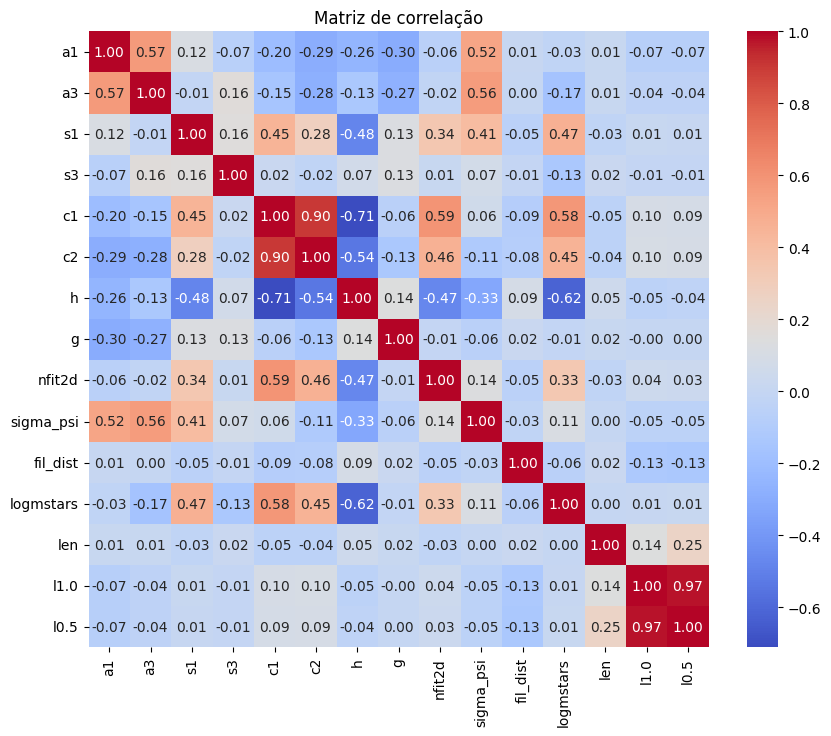

In [24]:
# Matriz de correlação fil ==> MFMTK
table = Table.read("/content/drive/MyDrive/FURG/Mestrado - Física/Pré-projeto - FURG/Amostragem e datasets/Database/MFMTK_SDSS_clusters_z_logmstars.fits", format="fits")
df = pd.DataFrame(table.to_pandas())
df.columns = [c.lower() for c in df.columns]

base_dir = '/content/drive/MyDrive/analises_galaxias_setore_novo'
os.makedirs(base_dir, exist_ok=True)

# parâmetros
parametros_desejados = ["a1", "a3", "s1", "s3", "c1", "c2", "h", "g", "nfit2d", "sigma_psi", "fil_dist", "logmstars", "len", "l1.0", "l0.5", "n1.0", "n0.5"]

# Filter to include only existing columns
parametros_existentes = [param for param in parametros_desejados if param in df.columns]

# Convert relevant existing columns to numeric, coercing errors to NaN
for param in parametros_existentes:
    df[param] = pd.to_numeric(df[param], errors='coerce')

# Matriz de correlação (parâmetros)
correlation_matrix = df[parametros_existentes].corr()

# Mostrar
if correlation_matrix is not None:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de correlação')
    plt.show()

    # Gerar diretório para os plots
    correlation_plots_dir = os.path.join(base_dir, "correlation_plots")
    os.makedirs(correlation_plots_dir, exist_ok=True)

    # Salvar
    plot_filename = os.path.join(correlation_plots_dir, "correlation_matrix.png")
    plt.savefig(plot_filename)
    plt.close() # Close the plot to free up memory
